<a href="https://colab.research.google.com/github/jramirezgen/ExData_Plotting1/blob/master/ML_S01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

In [2]:
df <- read.csv("/content/lr1.csv")
head(df)

,x,y
,<dbl>,<dbl>
1,82.06171,44.14996
2,103.69698,68.60575
3,131.75691,89.79343
4,77.39249,32.19414
5,98.39496,67.30611
6,102.64841,51.09306


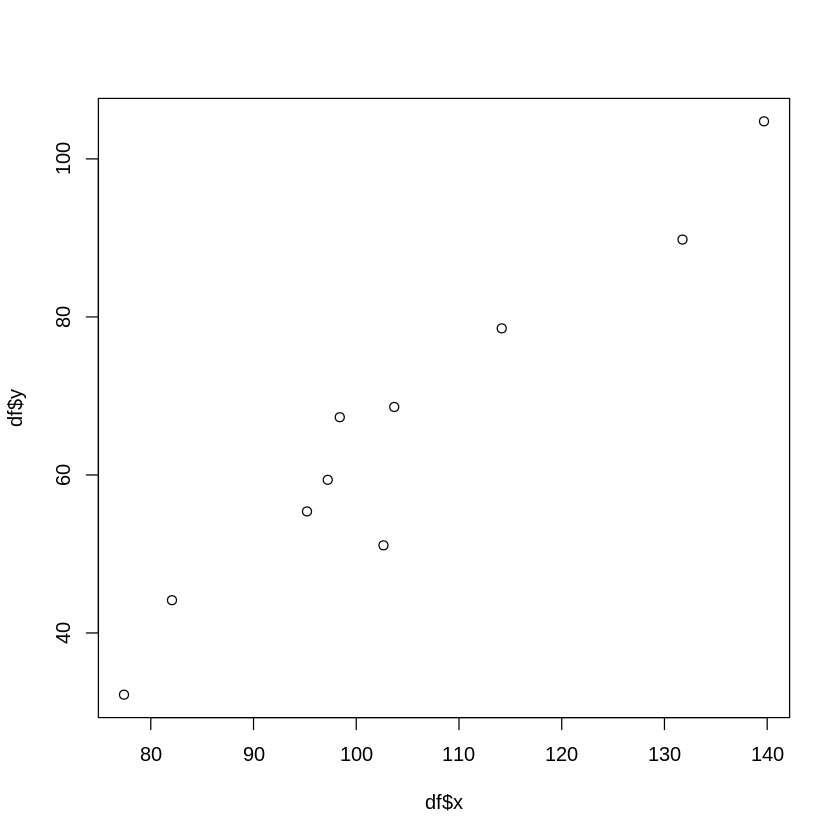

In [3]:
plot(df$x, df$y)

In [4]:
cor(df$x, df$y)

[1] 0.9636866

In [12]:
mod <- lm(y ~ x, data = df)
mod



Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
     -45.35         1.06  


In [14]:
summary(mod)



Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.360  -3.412   1.861   2.803   8.362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -45.3475    10.9952  -4.124  0.00332 ** 
x             1.0599     0.1038  10.207 7.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.137 on 8 degrees of freedom
Multiple R-squared:  0.9287,	Adjusted R-squared:  0.9198 
F-statistic: 104.2 on 1 and 8 DF,  p-value: 7.281e-06


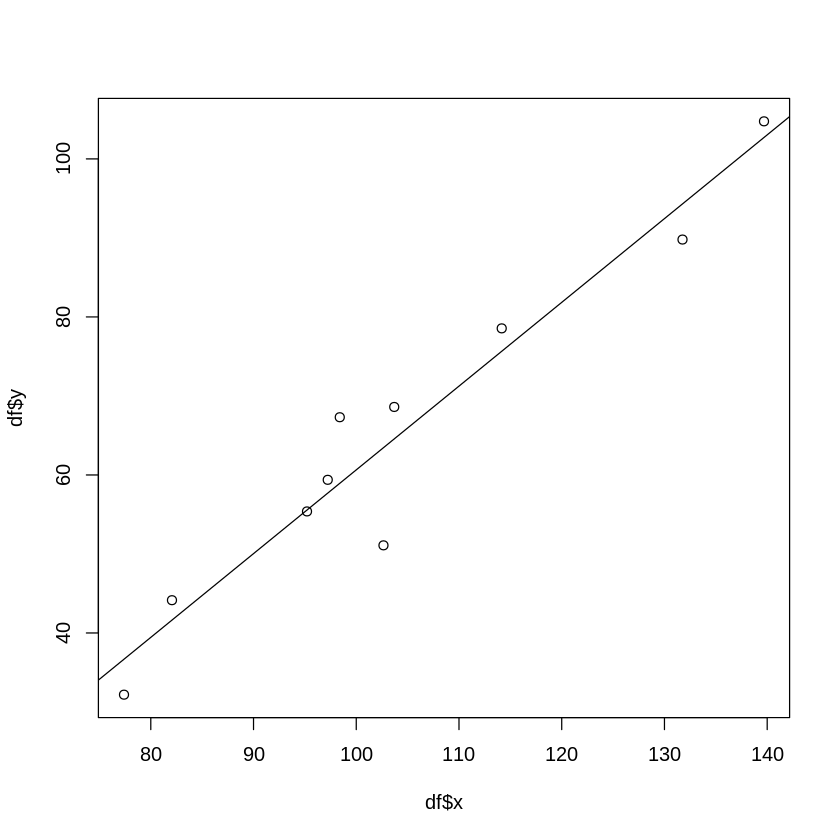

In [16]:
plot(df$x, df$y)
abline(mod)

Los modelos pueden generar predicciones pero no significa que no tengan errores.

In [17]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


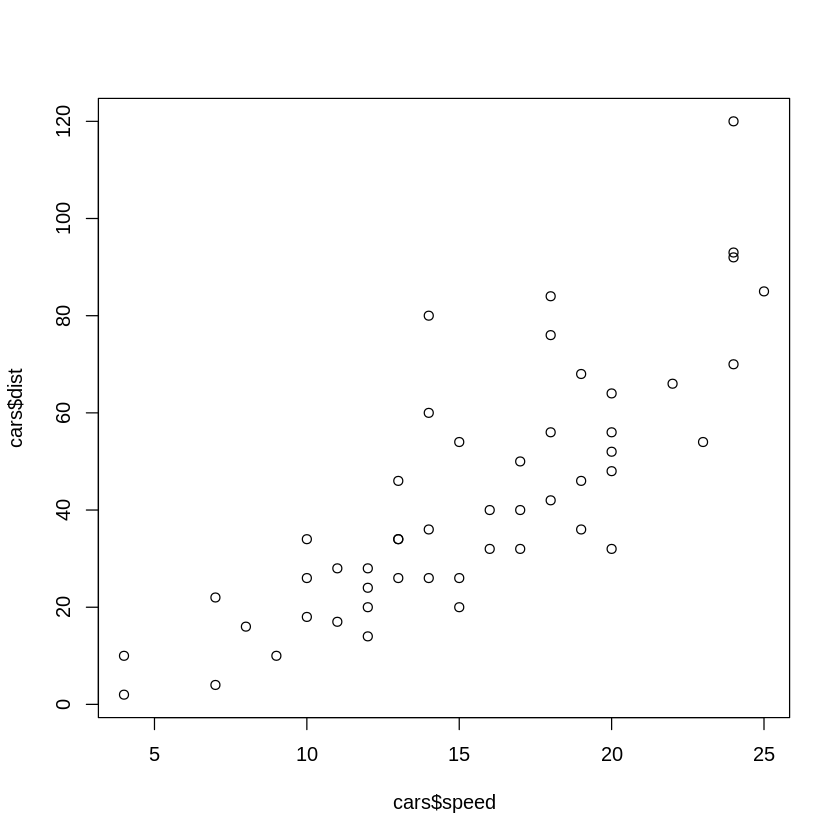

In [18]:
plot(cars$dist ~ cars$speed)

In [20]:
mod <- lm(dist ~ speed, data = cars)
mod


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


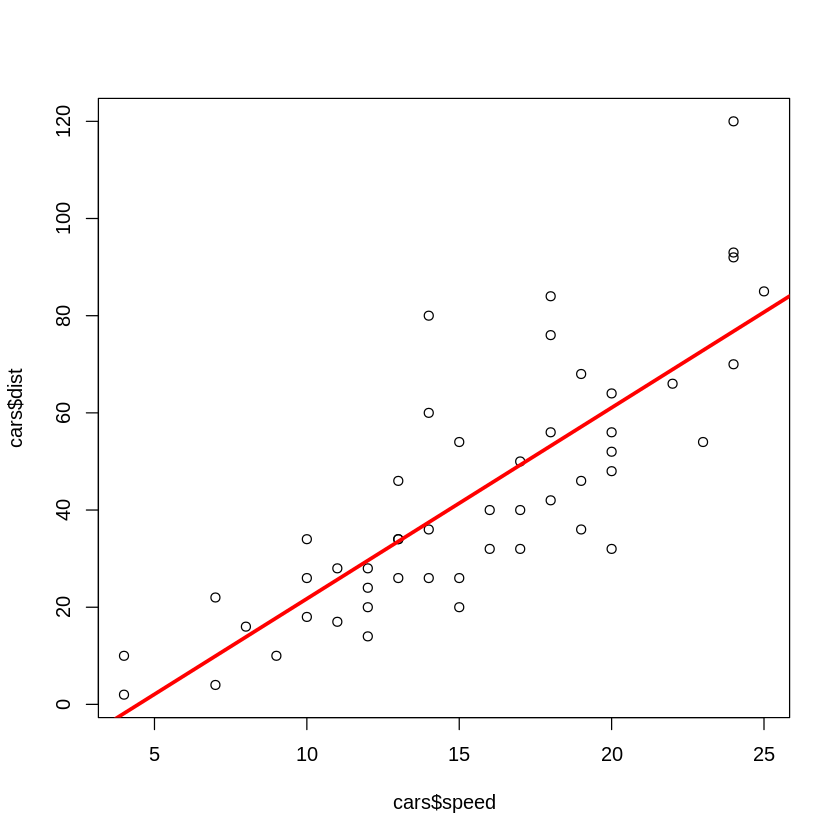

In [23]:
plot(cars$dist ~ cars$speed)
abline(mod,col="red",lwd=3)

In [24]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


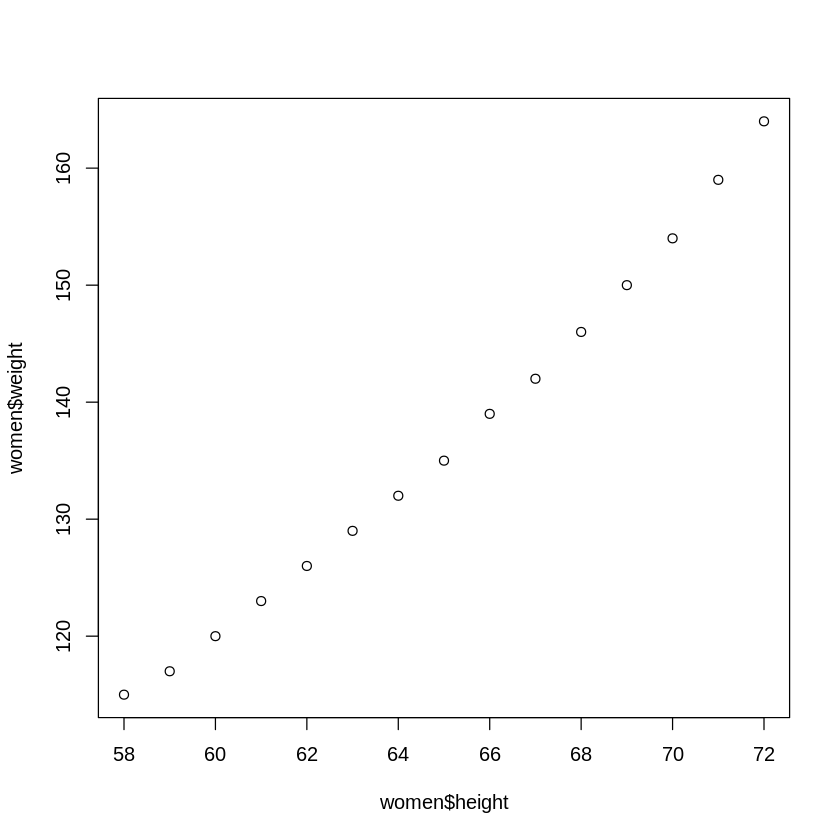

In [25]:
plot(women$weight ~ women$height)

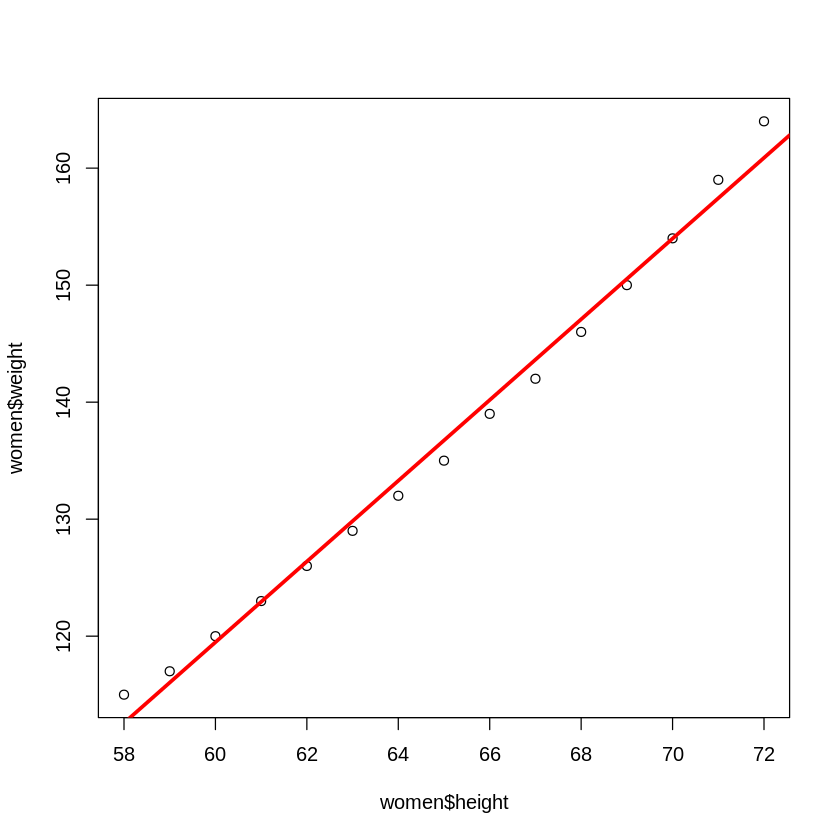

In [26]:
mod <- lm(weight ~ height, data = women )
plot(women$weight ~ women$height)
abline(mod,col="red",lwd=3)

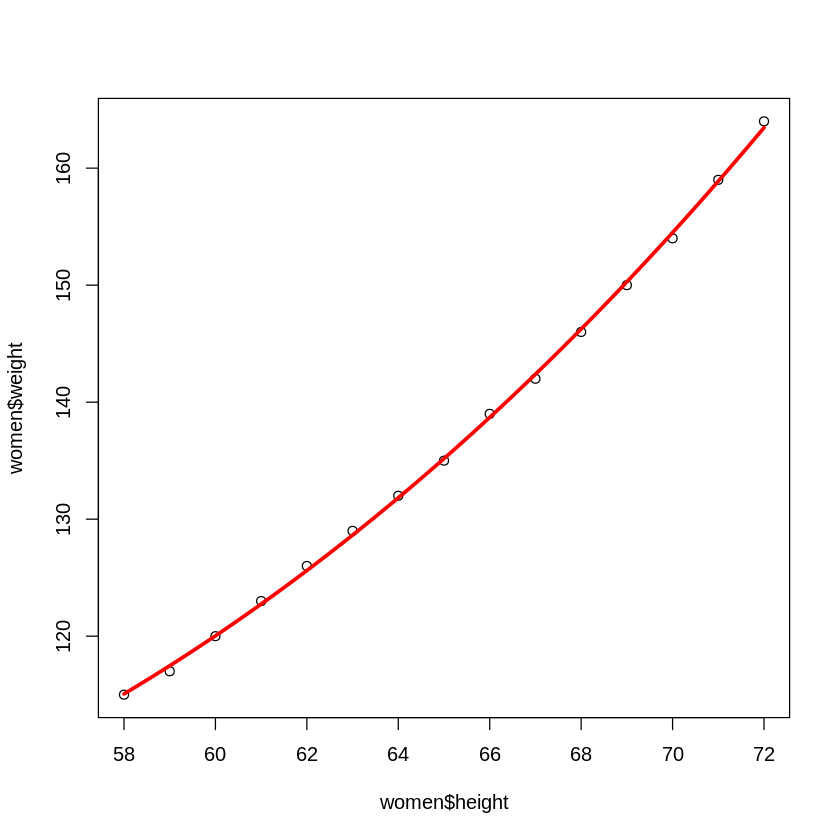

In [30]:
mod.reg <- lm(women$weight ~ women$height + I(women$height^3))
k <- coef(mod.reg)
plot(women$weight ~ women$height)
curve(k[1]+k[2]*x+k[3]*x^3,col="red",lwd=3, add=TRUE)

In [32]:
df <- read.csv("/content/BPIYA.csv")
head(df)

,group,protein
,<chr>,<dbl>
1,control,91.87856
2,control,113.03550
3,control,89.40966
4,patient,237.71703
5,patient,188.89266
6,patient,190.15586


In [34]:
df$group <- factor(df$group)
summary(df)

     group          protein     
 control:10000   Min.   : 18.5  
 patient:10000   1st Qu.:100.4  
                 Median :140.2  
                 Mean   :140.1  
                 3rd Qu.:179.9  
                 Max.   :253.9  

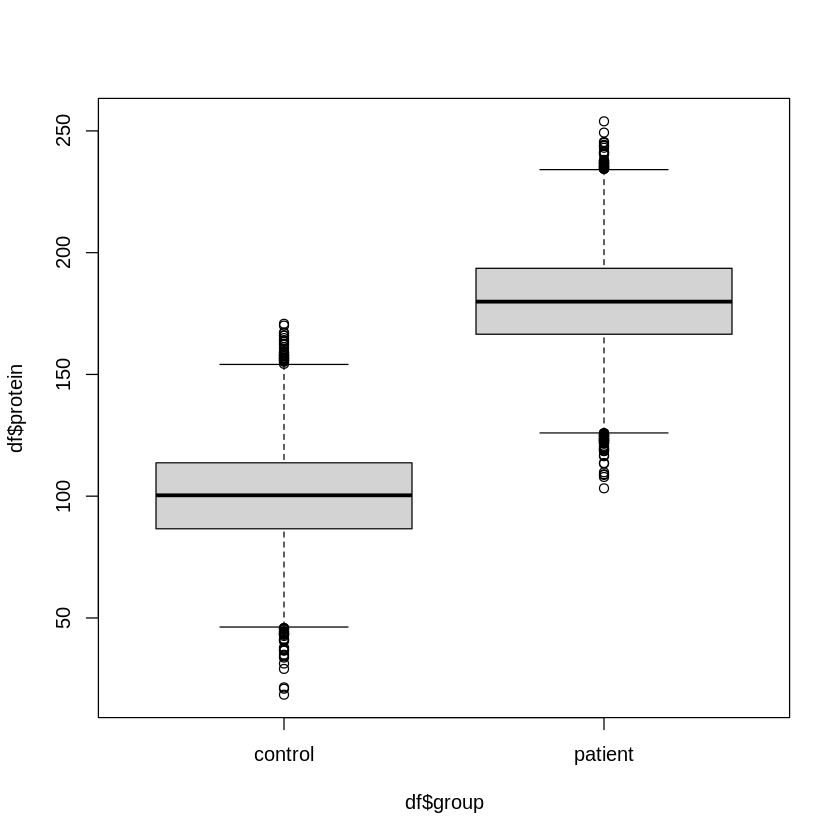

In [35]:
boxplot(df$protein ~ df$group)

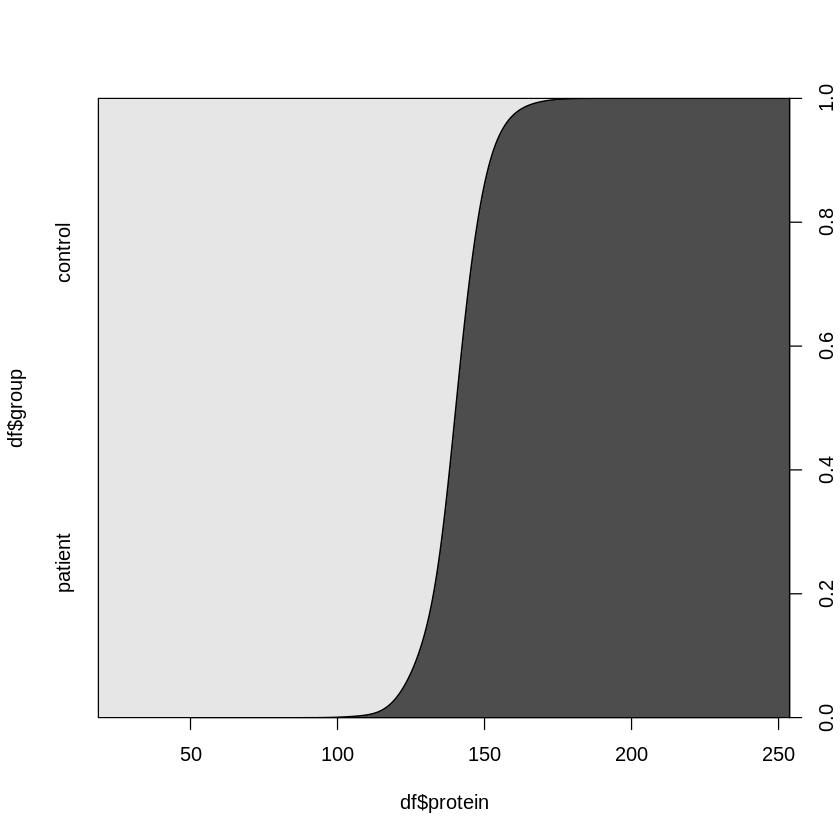

In [36]:
cdplot(df$group ~ df$protein)

## Regresión logistica

In [38]:
modLR <- glm(group ~ protein, data=df, family="binomial")
modLR


Call:  glm(formula = group ~ protein, family = "binomial", data = df)

Coefficients:
(Intercept)      protein  
   -26.7426       0.1912  

Degrees of Freedom: 19999 Total (i.e. Null);  19998 Residual
Null Deviance:	    27730 
Residual Deviance: 2566 	AIC: 2570

In [40]:
head(predict(modLR))

1         2         3         4         5         6 
-9.175407 -5.130193 -9.647460 18.708956  9.373721  9.615245

In [41]:
head(predict(modLR, type="response"))

1            2            3            4            5            6 
1.035444e-04 5.880634e-03 6.458524e-05 1.000000e+00 9.999151e-01 9.999333e-01

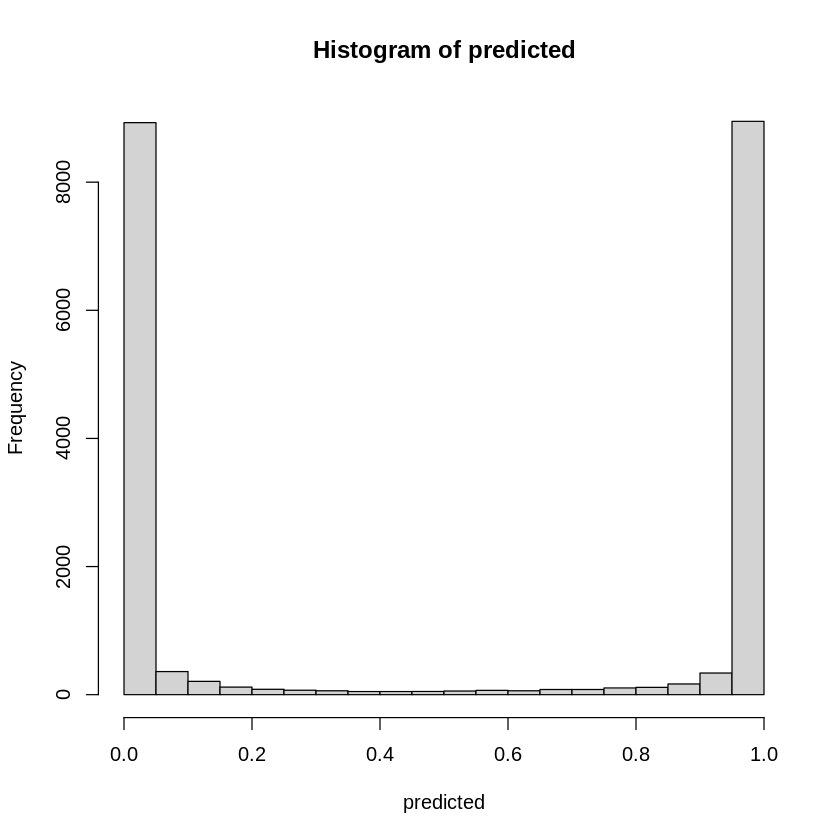

In [42]:
predicted <- predict(modLR, type = "response")
hist(predicted)